In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from skimage.io import imread_collection
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [2]:
train = pd.read_csv(r"C:\Users\Vivek\Desktop\5 project\CNN\Train.csv")

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
os.chdir('C:/Users/Vivek/Desktop/5 project/CNN/')


In [5]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


In [6]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
data

array([[[[ 75,  78,  80],
         [ 74,  76,  78],
         [ 85,  86,  84],
         ...,
         [ 68,  75,  74],
         [ 65,  69,  68],
         [ 66,  67,  66]],

        [[ 83,  84,  86],
         [ 80,  80,  82],
         [ 88,  88,  83],
         ...,
         [ 73,  77,  78],
         [ 76,  78,  75],
         [ 80,  80,  78]],

        [[ 78,  78,  80],
         [ 86,  85,  86],
         [ 90,  89,  90],
         ...,
         [ 71,  74,  71],
         [ 73,  74,  69],
         [ 78,  78,  74]],

        ...,

        [[133, 134, 139],
         [123, 127, 132],
         [112, 121, 125],
         ...,
         [ 94,  95,  89],
         [ 97,  98,  91],
         [ 99, 103,  99]],

        [[ 91,  95,  99],
         [ 91,  98, 103],
         [ 75,  86,  90],
         ...,
         [104, 102,  96],
         [110, 113, 104],
         [ 96, 104,  98]],

        [[ 85,  84,  87],
         [ 95, 101, 107],
         [ 63,  76,  81],
         ...,
         [103, 103,  95],
        

# Splitting training and testing dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Converting the labels into one hot encoding

In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the model

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 147s 145ms/step - loss: 3.4078 - accuracy: 0.3356 - val_loss: 0.6496 - val_accuracy: 0.8452
Epoch 2/15
981/981 [==============================] - 131s 133ms/step - loss: 0.8867 - accuracy: 0.7462 - val_loss: 0.2336 - val_accuracy: 0.9458
Epoch 3/15
981/981 [==============================] - 129s 132ms/step - loss: 0.5744 - accuracy: 0.8329 - val_loss: 0.1473 - val_accuracy: 0.9638
Epoch 4/15
981/981 [==============================] - 143s 146ms/step - loss: 0.4168 - accuracy: 0.8794 - val_loss: 0.1393 - val_accuracy: 0.9602
Epoch 5/15
981/981 [==============================] - 166s 169ms/step - loss: 0.3572 - accuracy: 0.8978 - val_loss: 0.0820 - val_accuracy: 0.9754
Epoch 6/15
981/981 [==============================] - 164s 167ms/step - loss: 0.3239 - accuracy: 0.9090 - val_loss: 0.1095 - val_accuracy: 0.9676
Epoch 7/15
981/981 [==============================] - 138s 141ms/step - loss: 0.2937 - accuracy: 0.9170 - val_loss: 0.1404 -

# plotting graphs for accuracy 

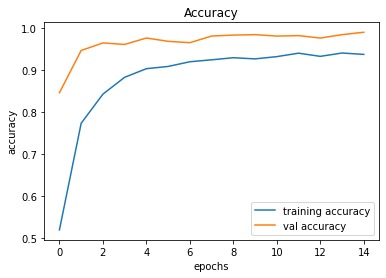

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

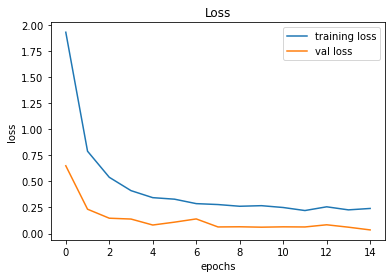

In [15]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing accuracy on test dataset

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Accuracy with the test data

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9555819477434679
